# Gaussian Beam Propagation

## Import files

In [1]:
import BeamProp_Script as bs      # This is the script that handles the propagation
import sympy as sym               # For Symbolic examples
import numpy as np                # Handling of lists and for plotting
import matplotlib.pyplot as plt   # Plotting

### Let's show what BeamProp_Script has

In [2]:
help(bs)

Help on module BeamProp_Script:

NAME
    BeamProp_Script - Created on Wed Feb 19 15:51:54 2020

DESCRIPTION
    @author: wrighta

FUNCTIONS
    W0(zr, lam)
        Parameters
        ----------
        zr : float, integer, symbol
            Rayleigh range in meters
        lam : float, integer, symbol
            Wavelength of light in meters
        
        Returns
        -------
        w0 : float, integer, symbol
            Beam waist radius in meters
    
    Zr(wo, lam)
        Parameters
        ----------
        wo : float, integer, or symbol
            Beam waist radius in meters.
        lam : float, integer, or symbol
            Wavelength of light in meters.
        
        Returns
        -------
        zr : float, int, symbols
            Rayleigh range for given beam waist and wavelength.
    
    lens(f)
        Parameters
        ----------
        f : float or integer or sympy symbol in meters
            Thin lens focal length in meters
        
        Retu

## Let's first see how we define a beam and how we can visualize it propagating.

### A Gaussian beam can be defined by it's (radial) waist, $w_0$, it's Rayleigh range, $z_R = \frac{\pi * w_0^2}{\lambda}$, and the location of its waist, $z_0$.

In [3]:
w0 = 1E-3 # 1mm beam waist
lam = 355E-9 # wavelength of 355 nm (UV)
zR = bs.Zr(w0, lam) # Rayleigh range in m
z0 = 0 # location of waist in m

### We now want to define our "optical system" using matrices. For this first example, we will just use a free space propagation matrix, and let the beam propagate a distance $d$ which we will define using a symbol.

In [4]:
d = sym.symbols('d')
M = bs.prop(d)

### We now use the bs script to do all the ABCD and q-parameter math, and return the waist and radius of curvature functions

In [5]:
R, w = bs.q1_inv_func(0, w0, lam, M)

In [6]:
print('w = {}'.format(w))

w = 0.001*(0.0127690021685256*d**2 + 1)**0.5


### And as simple as that, we have a function for our waist. Let's plot it and see what it looks like

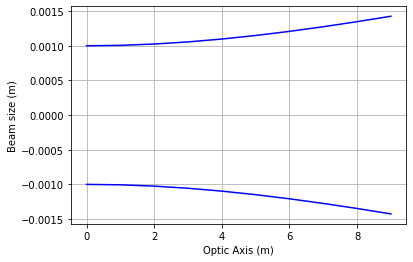

In [8]:
bs.plot(w, d, rang = np.arange(0,10))

### Let's show what happens when a beam travels through a lens. We use the "mult" function to multiply multiple ABCD matrices together.

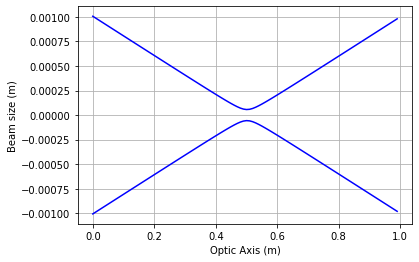

In [12]:
w0 = 1E-3 # 1mm beam waist
lam = 355E-9 # wavelength of 355 nm (UV)
zR = bs.Zr(w0, lam) # Rayleigh range in m
z0 = 0 # location of waist in m

d = sym.symbols('d')
M = bs.mult(bs.prop(d), bs.lens(.5), bs.prop(1))
            
R, w = bs.q1_inv_func(0, w0, lam, M)

bs.plot(w, d, rang = np.arange(0,1,.01))